In [24]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [25]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


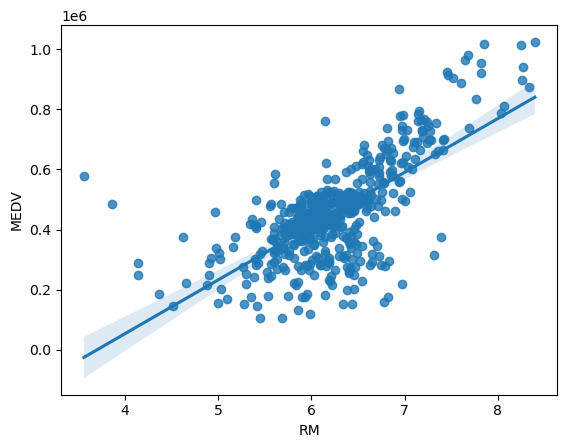

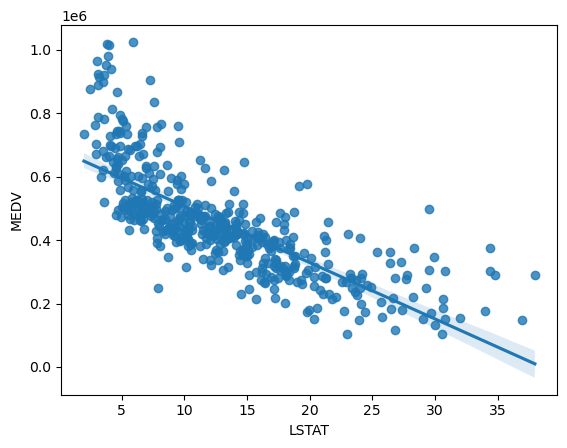

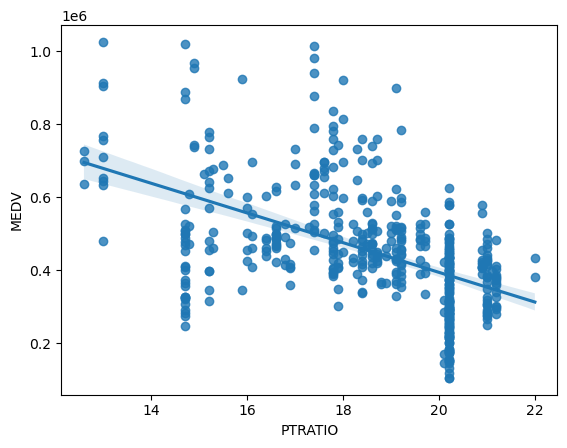

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(x=data[var],y=prices)
    plt.show()

In [27]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [28]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [29]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=100)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [30]:
# Produce learning curves for varying training set sizes and maximum depths
import warnings
warnings.filterwarnings("ignore")  # suppress warnings

In [31]:
def model_learning_viz(X, y, depths=[1, 3, 6, 10]):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    
    for k, depth in enumerate(depths):
        regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
        train_sizes, train_scores, test_scores = learning_curve(
            regressor, X, y, train_sizes=np.linspace(0.1, 1.0, 9),
            cv=cv, scoring='r2', shuffle=True, random_state=42)

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        ax = axes[k]
        ax.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(train_sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
        ax.set_title(f"max_depth = {depth}")
        ax.set_xlabel("Number of Training Points")
        ax.set_ylabel("Score")
        ax.set_ylim((0, 1.05))
        ax.set_xlim((0, len(X)))
        ax.grid(True)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=14, y=1.03)
    fig.tight_layout()
    plt.show()


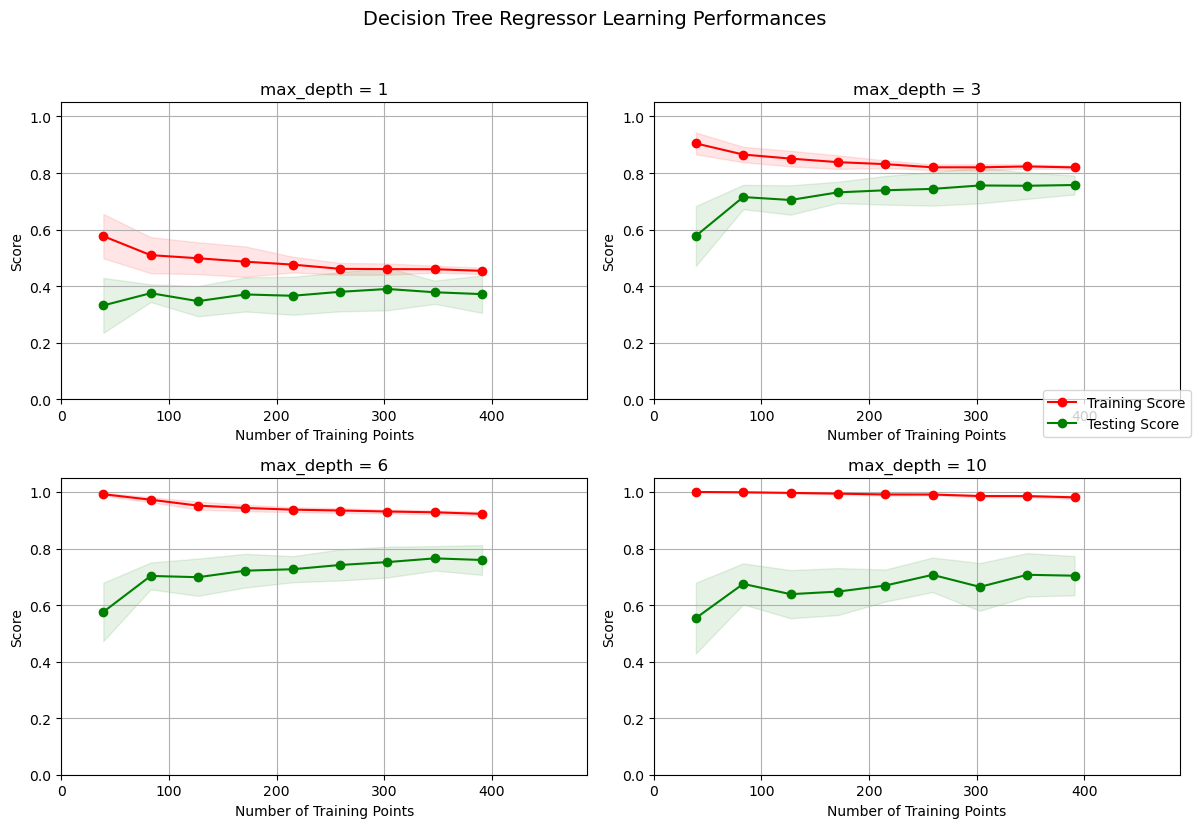

In [32]:
model_learning_viz(features, prices)

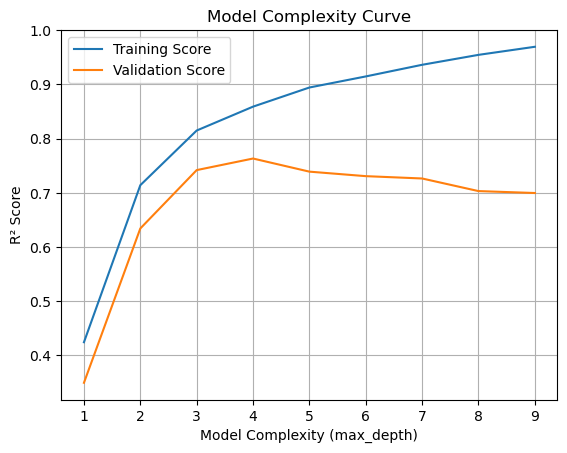

In [33]:
max_depths = range(1, 10)
train_scores = []
val_scores = []

for d in max_depths:
    reg = DecisionTreeRegressor(max_depth=d)
    reg.fit(X_train, y_train)
    train_scores.append(reg.score(X_train, y_train))
    val_scores.append(np.mean(cross_val_score(reg, X_train, y_train, cv=3)))

plt.plot(max_depths, train_scores, label='Training Score')
plt.plot(max_depths, val_scores, label='Validation Score')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('R² Score')
plt.legend()
plt.title('Model Complexity Curve')
plt.grid(True)
plt.show()

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [35]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [36]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,333.33
Predicted selling price for Client 2's home: $240,947.37
Predicted selling price for Client 3's home: $893,700.00
